In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
### display some portion of data 
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
### to check the null values and datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [6]:
##check unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
## check the statistics for the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
#### get unique values for categorical variables
print("The unique values for gender : ", df['gender'].unique())
print("The unique values for race/ethnicity: ", df['race/ethnicity'].unique())
print("The unique values for parental level of education : ", df['parental level of education'].unique())
print("The unique values for lunch : ", df['lunch'].unique())
print("The unique values for test preparation course: ", df['test preparation course'].unique())

The unique values for gender :  ['female' 'male']
The unique values for race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values for parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values for lunch :  ['standard' 'free/reduced']
The unique values for test preparation course:  ['none' 'completed']


In [9]:
### define categorical and numerical features
cat_features = [feature for feature in df.columns if df[feature].dtype==object ]
print("the categorical features in the dataset are", cat_features)
num_features = [feature for feature in df.columns if df[feature].dtype!=object ]
print("the numerical features in the dataset are", num_features)


the categorical features in the dataset are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
the numerical features in the dataset are ['math score', 'reading score', 'writing score']


In [10]:
### Add columns for Total score and Average
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
df.to_csv('stud.csv')

In [11]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
writing_full = df[df['writing score'] == 100]['Average_score'].count()
math_full = df[df['math score'] == 100]['Average_score'].count()
print("The number of students scoring full marks in math", math_full)
print("The number of students scoring full marks in reading", reading_full)
print("The number of students scoring full marks in writing", writing_full)


The number of students scoring full marks in math 7
The number of students scoring full marks in reading 17
The number of students scoring full marks in writing 14


In [12]:
reading_less_20 = df[df['reading score'] <= 20]['Average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average_score'].count()
math_less_20 = df[df['math score'] <= 20]['Average_score'].count()
print("The number of students scoring full marks in math", math_less_20)
print("The number of students scoring full marks in reading", reading_less_20)
print("The number of students scoring full marks in writing", writing_less_20)

The number of students scoring full marks in math 4
The number of students scoring full marks in reading 1
The number of students scoring full marks in writing 3


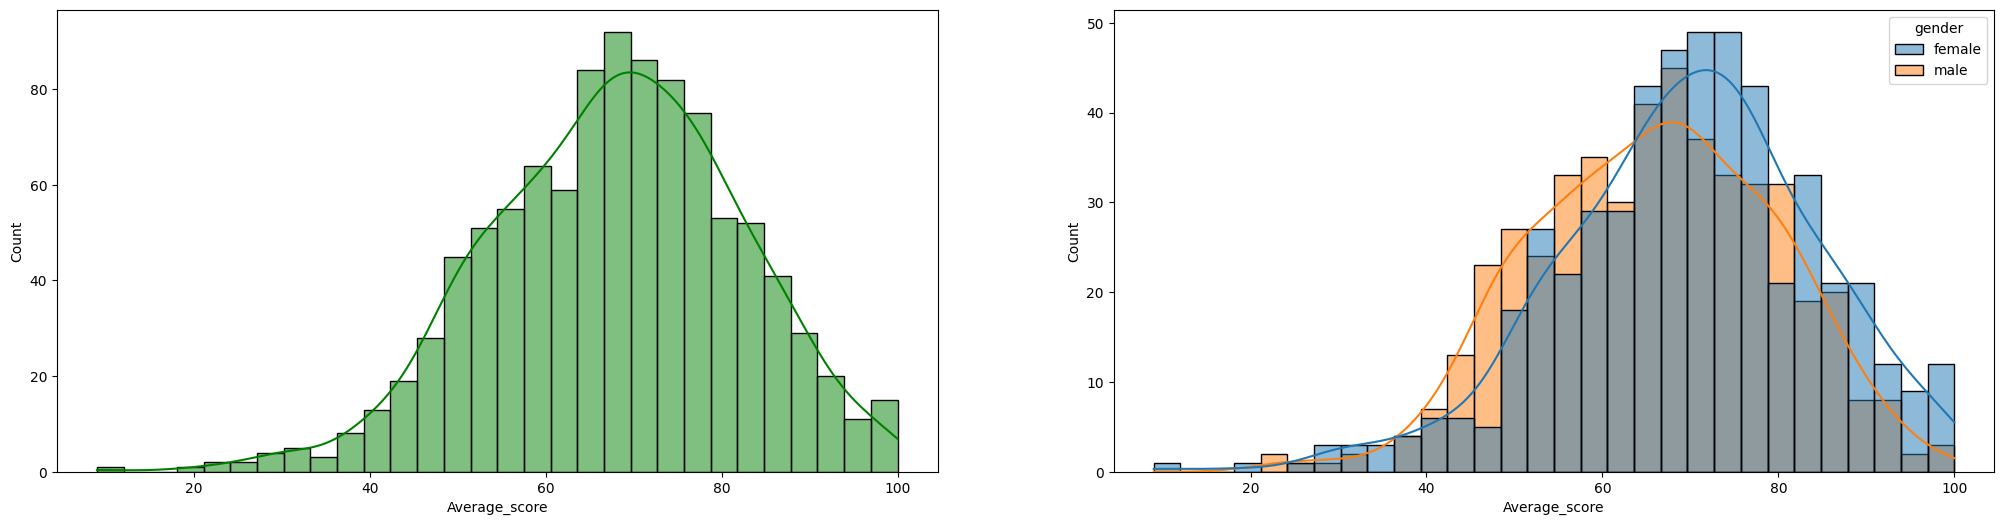

In [13]:
fig, axs = plt.subplots(1,2,figsize = (25,6))
plt.subplot(121)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True,hue ='gender', color = 'g')
plt.show()

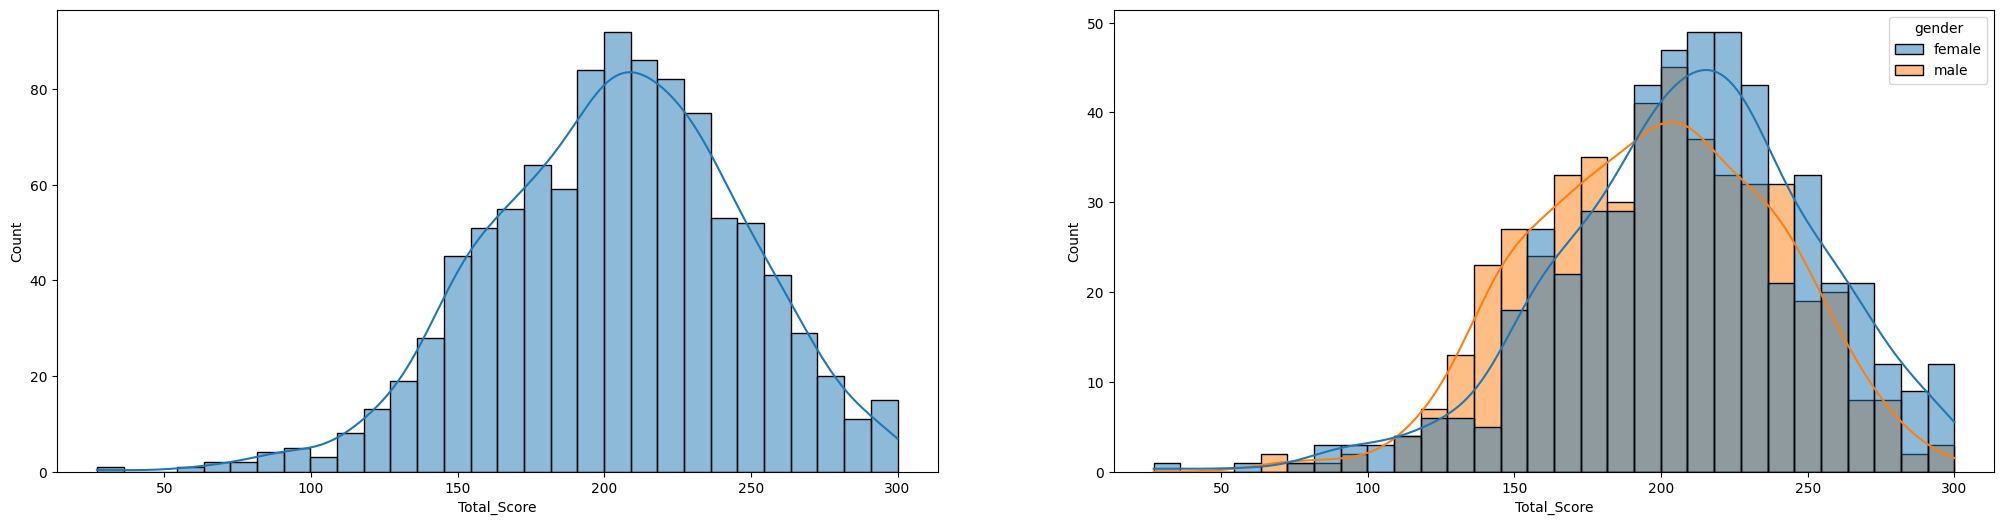

In [14]:
fig, axs = plt.subplots(1,2, figsize = (25,6))
plt.subplot(121)
sns.histplot(data = df, x ='Total_Score', kde=True, bins = 30 )
plt.subplot(122)
sns.histplot(data = df, x ='Total_Score',bins = 30, kde=True, hue = 'gender' )
plt.show()

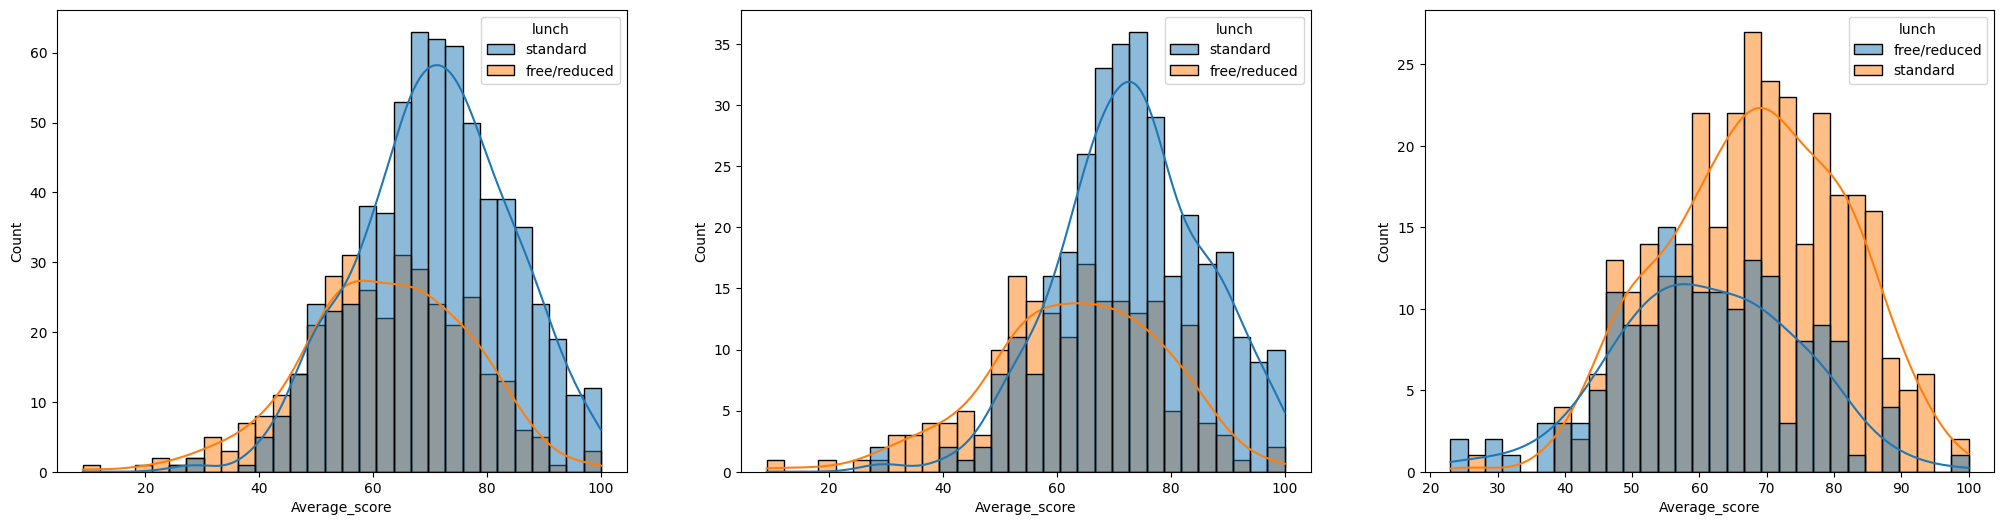

In [15]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x ='Average_score', bins = 30, kde = True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x ='Average_score', bins = 30, kde = True, hue='lunch')
plt.show()


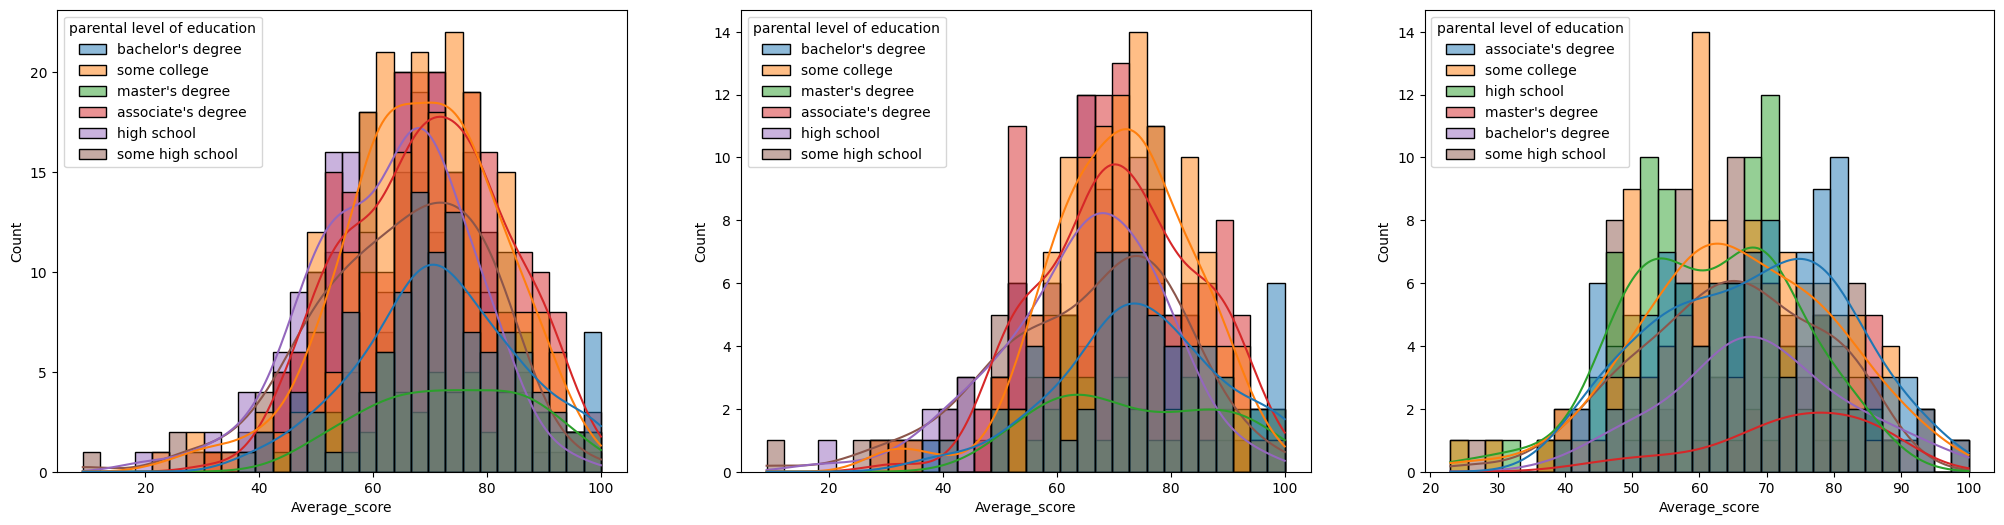

In [16]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x ='Average_score', bins = 30, kde = True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x ='Average_score', bins = 30, kde = True, hue='parental level of education')
plt.show()


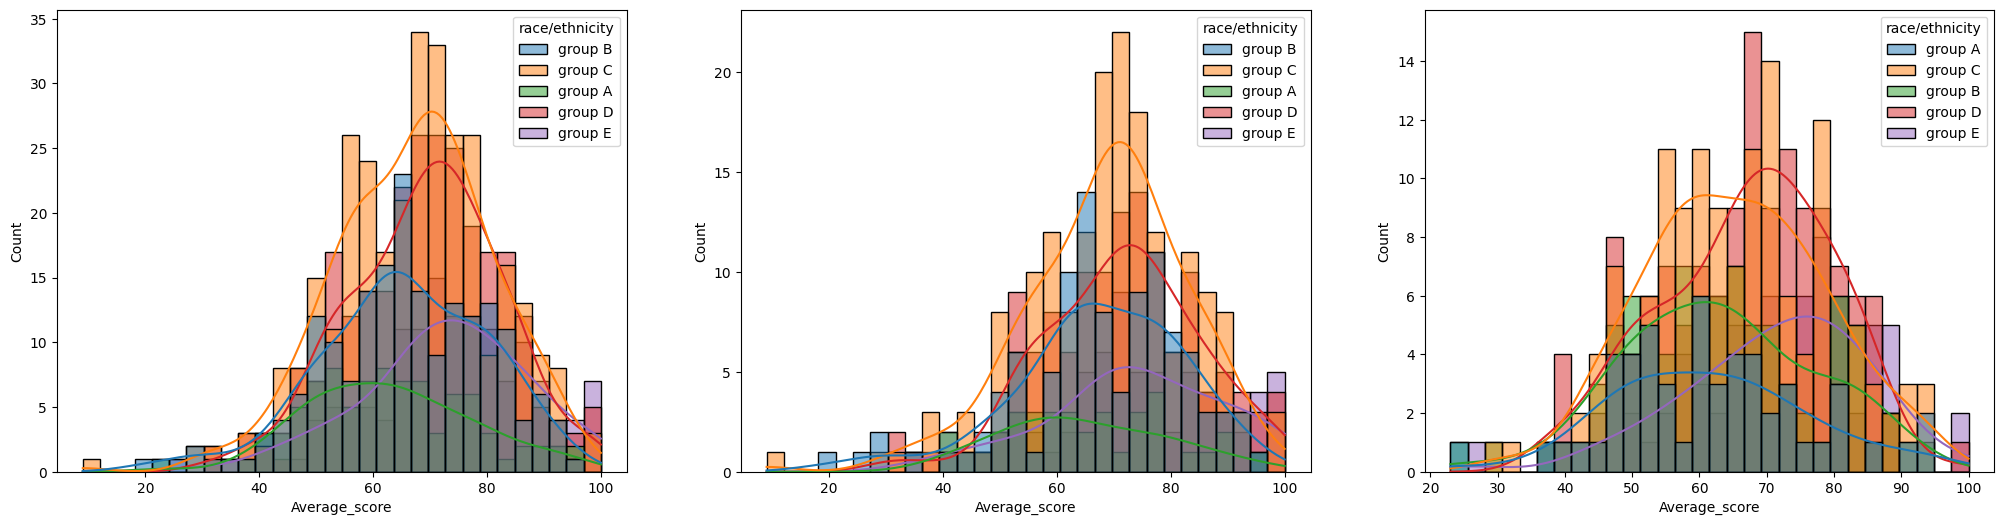

In [17]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average_score', bins = 30, kde = True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x ='Average_score', bins = 30, kde = True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x ='Average_score', bins = 30, kde = True, hue='race/ethnicity')
plt.show()

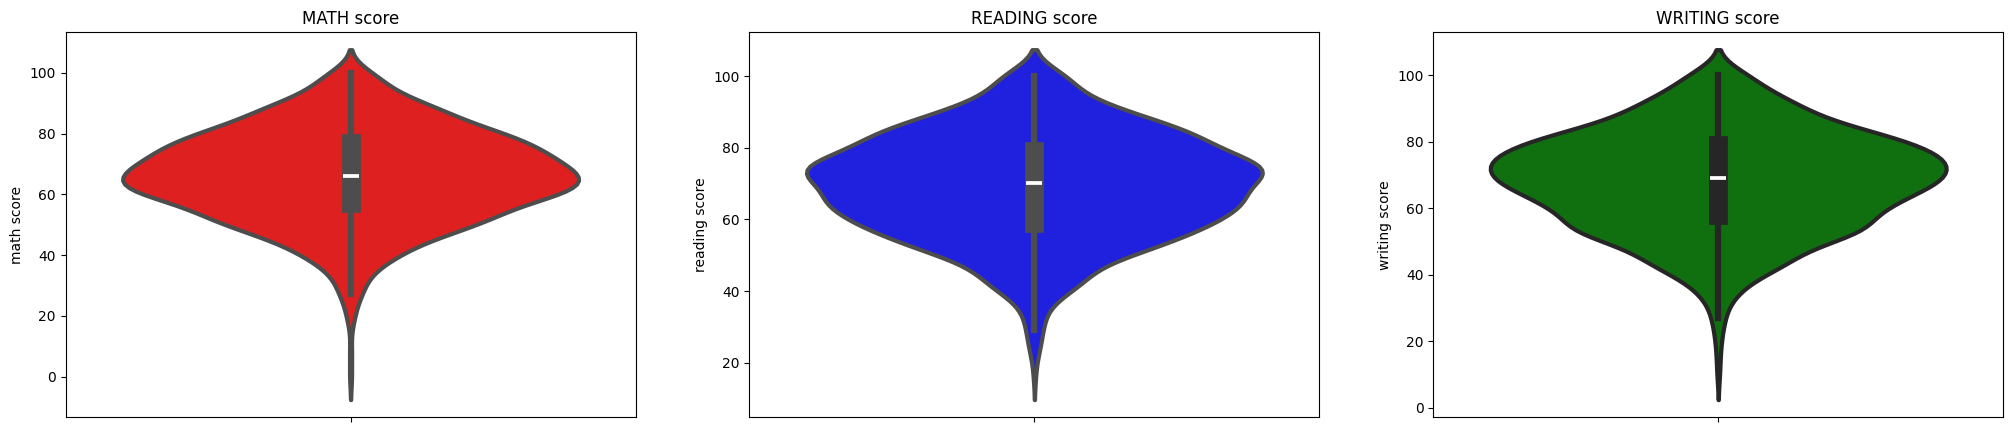

In [18]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('MATH score')
sns.violinplot(data = df, y ='math score', color = 'red', linewidth=3)
plt.subplot(132)
plt.title('READING score')
sns.violinplot(data = df, y ='reading score', color = 'blue', linewidth=3)
plt.subplot(133)
plt.title('WRITING score')
sns.violinplot(data = df, y ='writing score', color = 'green', linewidth=3)
plt.show()

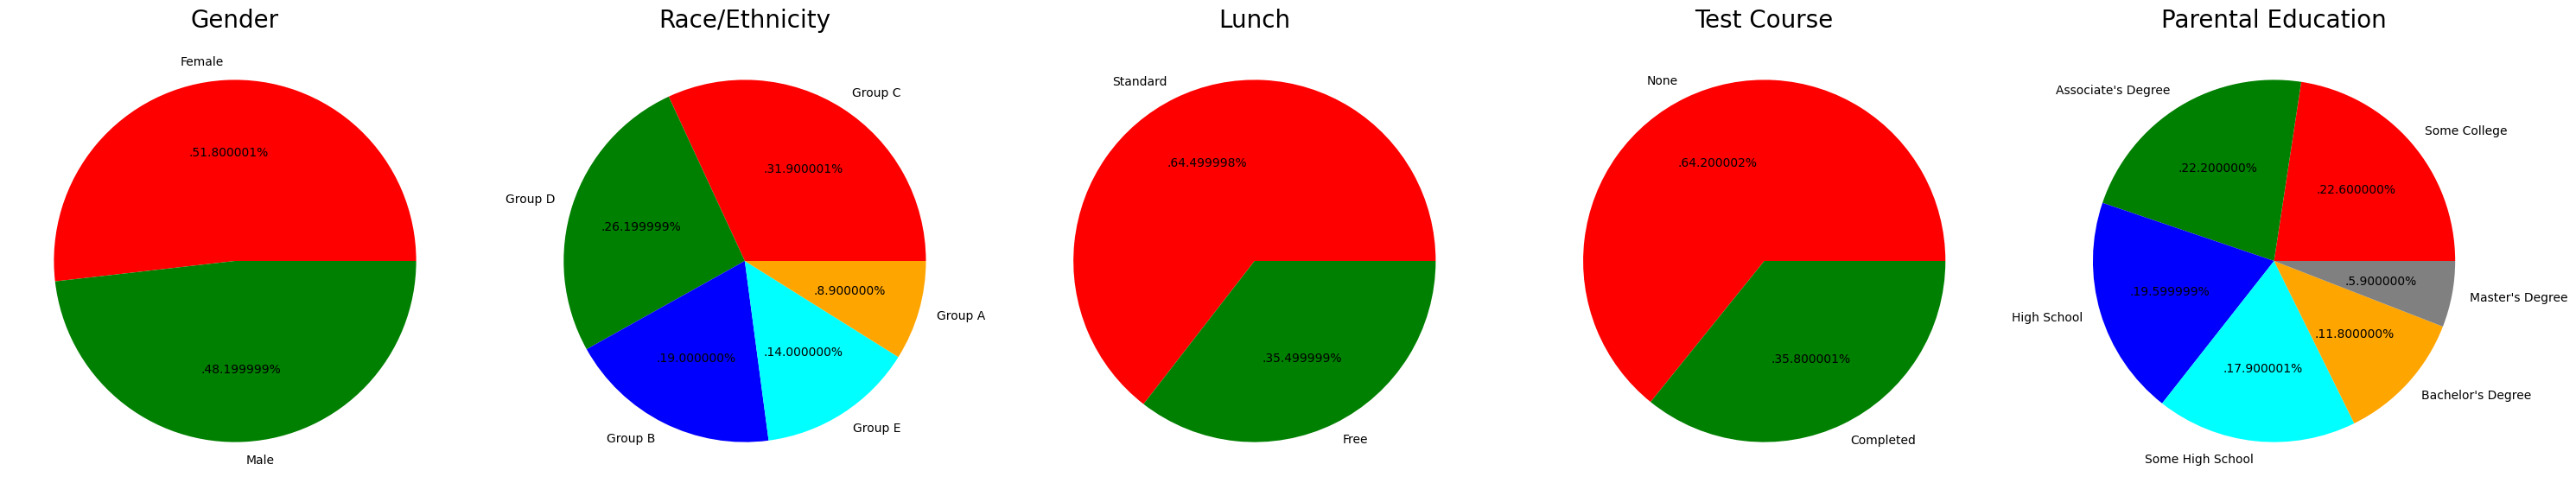

In [19]:
plt.rcParams['figure.figsize'] = (30,15)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female','Male' ]
color = ['red', 'green']
plt.pie(size,labels = labels, colors = color, autopct='.%2f%%' )
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

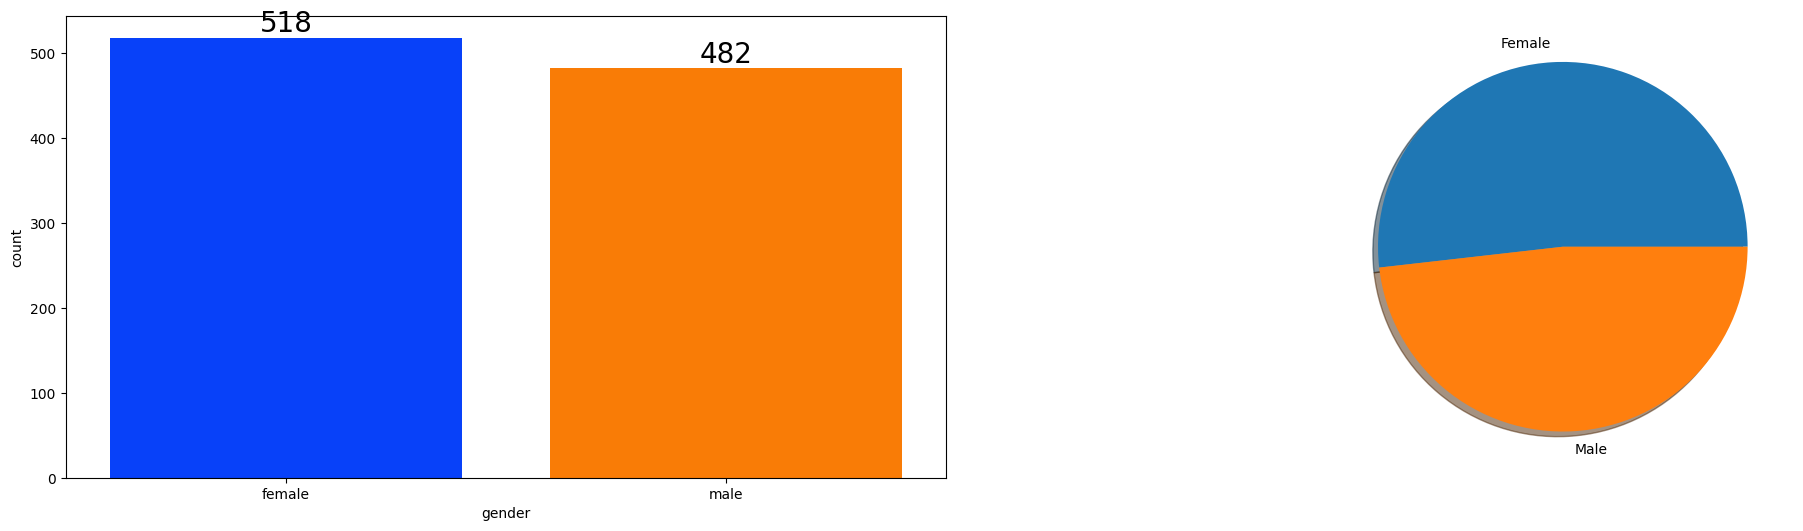

In [20]:
fig, axs = plt.subplots(1,2, figsize = (25,6))
sns.countplot(data = df, x= 'gender', palette= 'bright', ax = axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color = 'black', size = 20)

plt.pie(data= df, x = df['gender'].value_counts(), labels = ['Female', 'Male'], shadow=True)
plt.show()

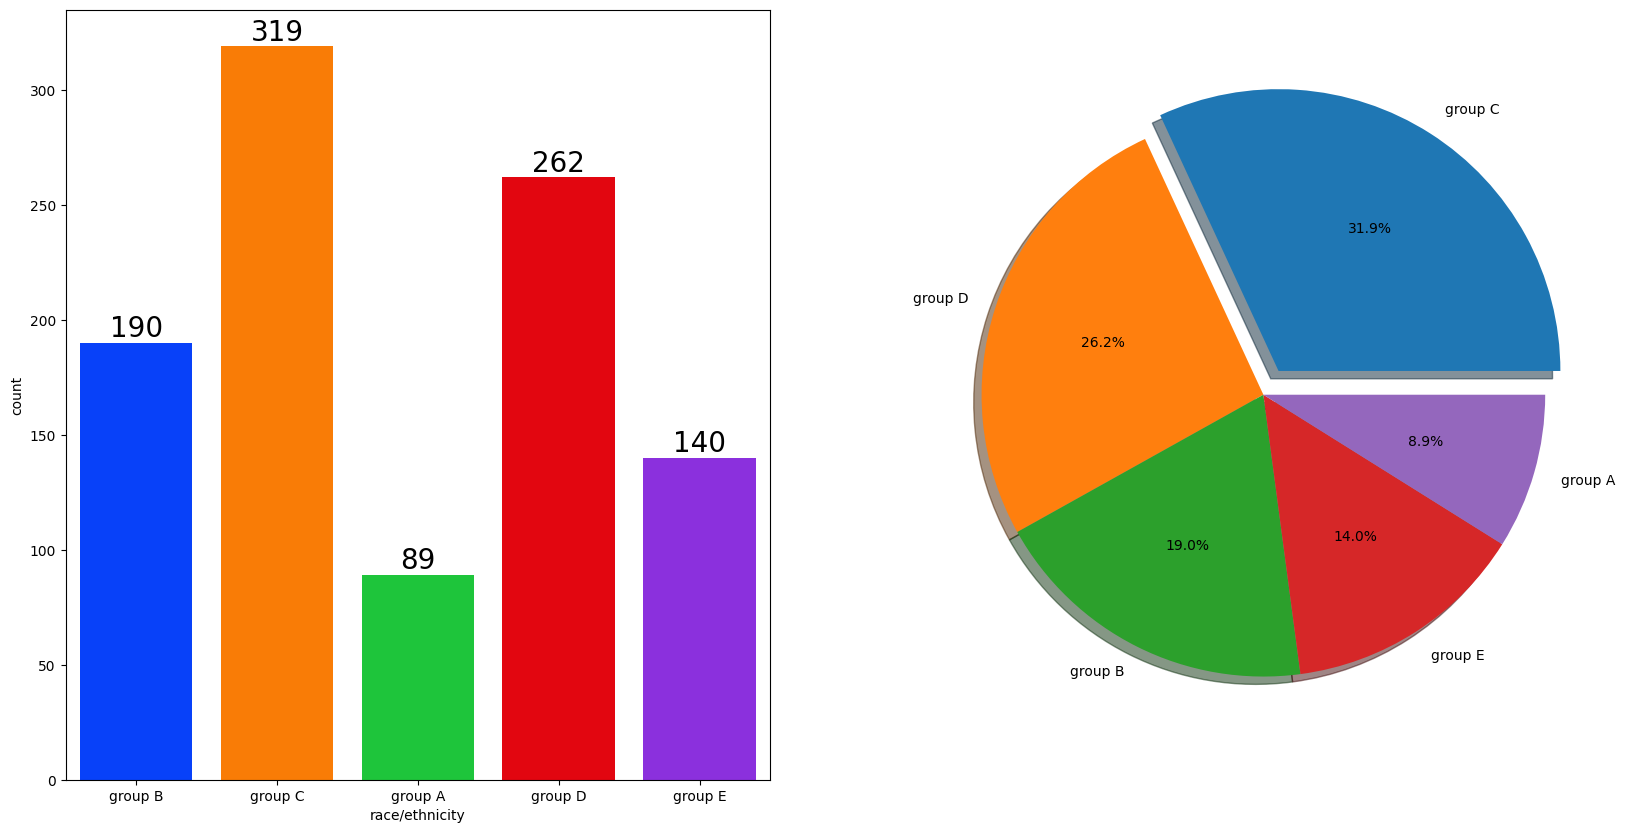

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

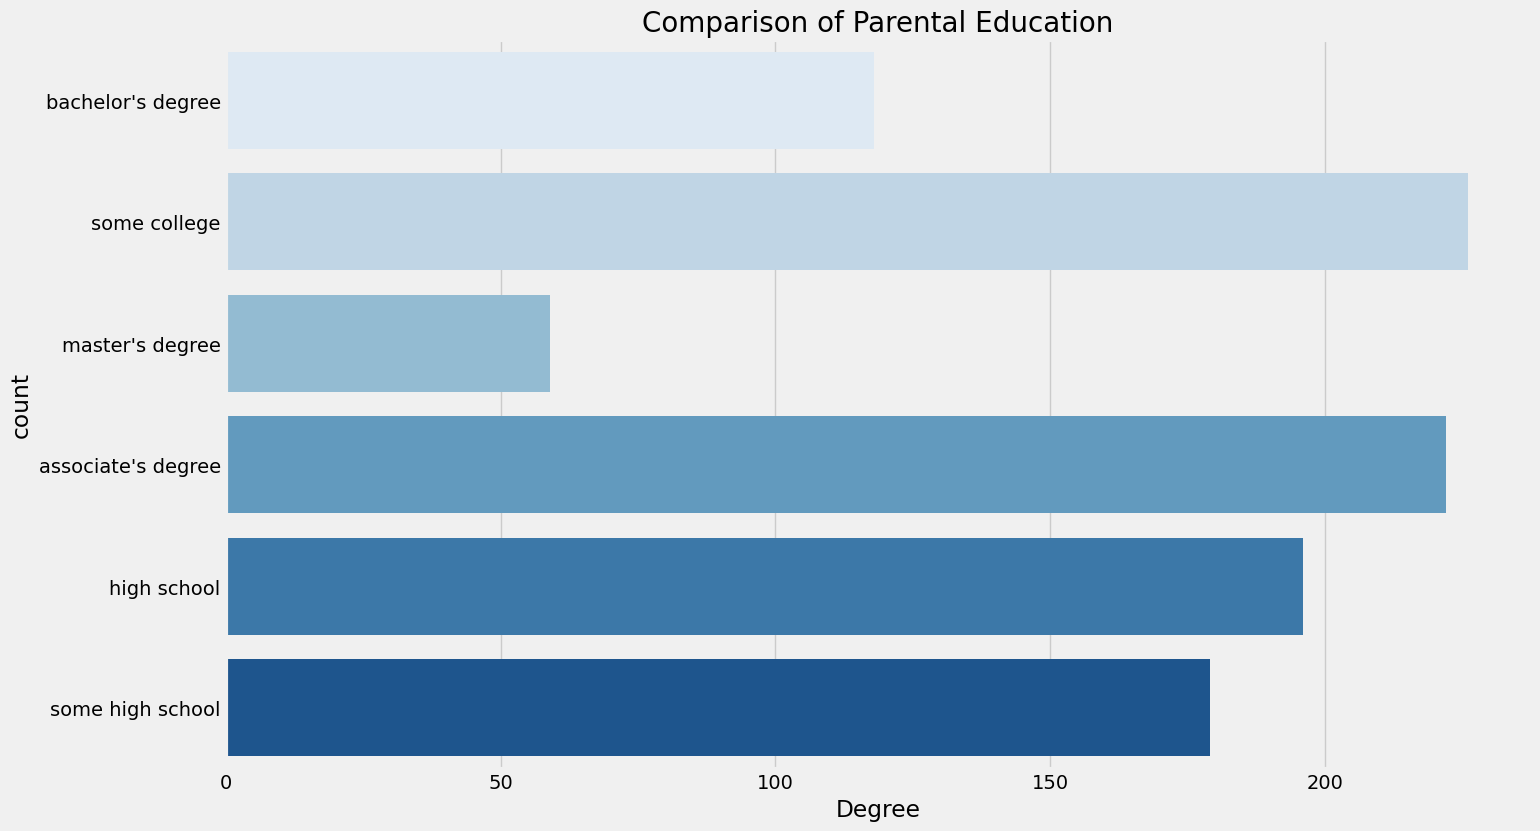

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

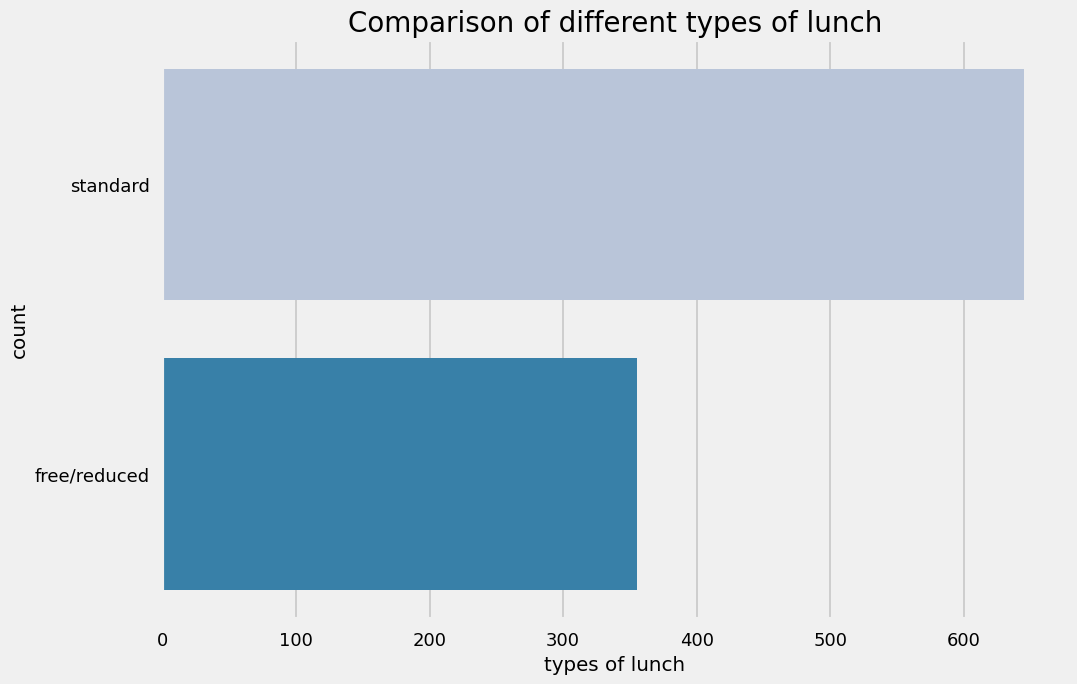

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

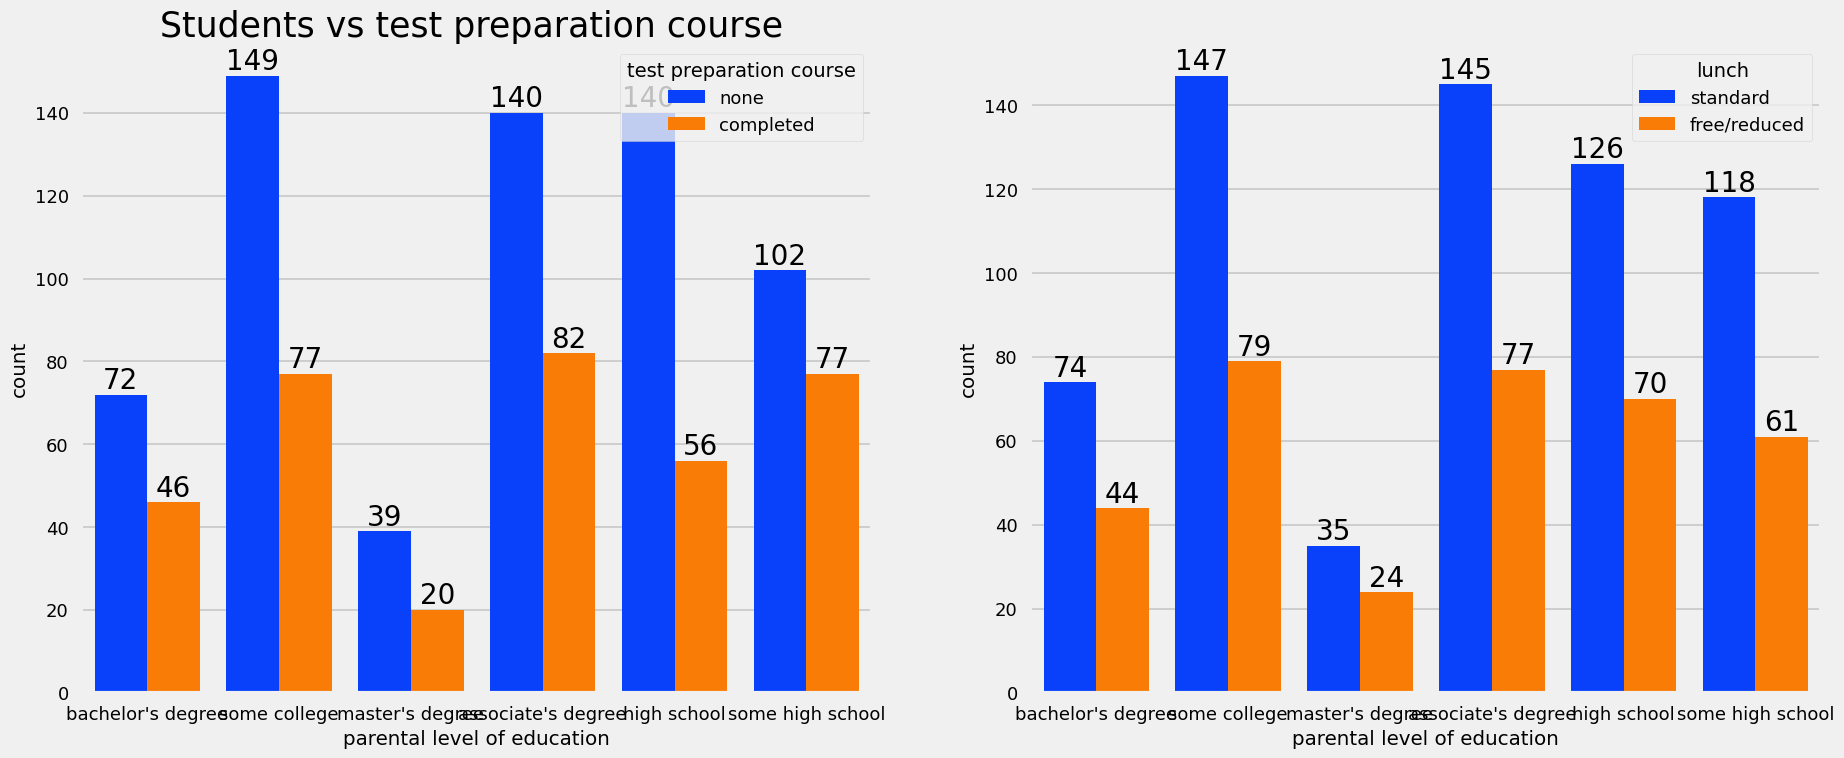

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

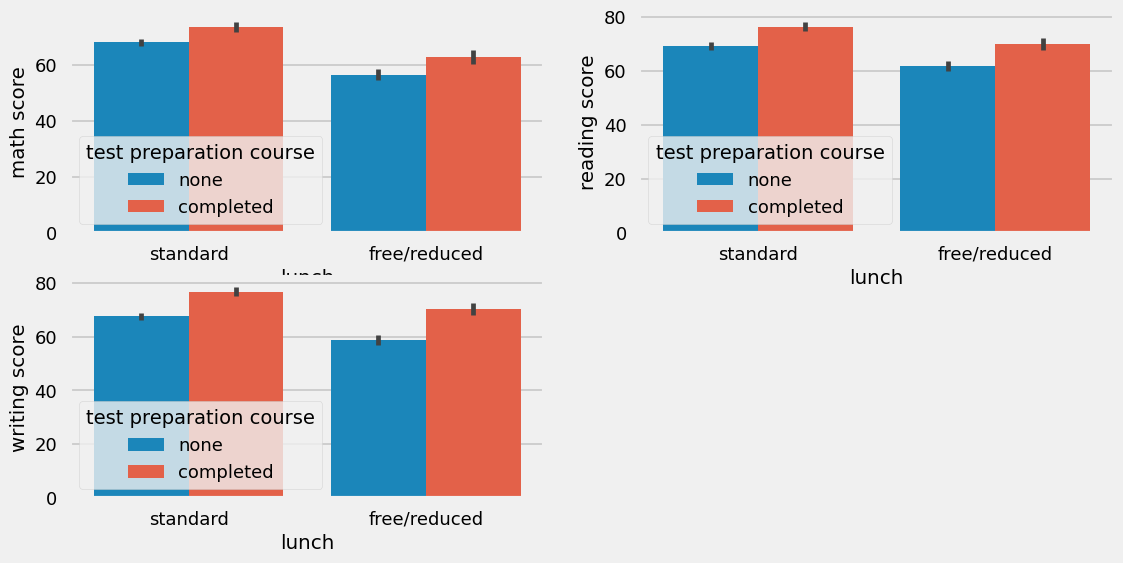

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

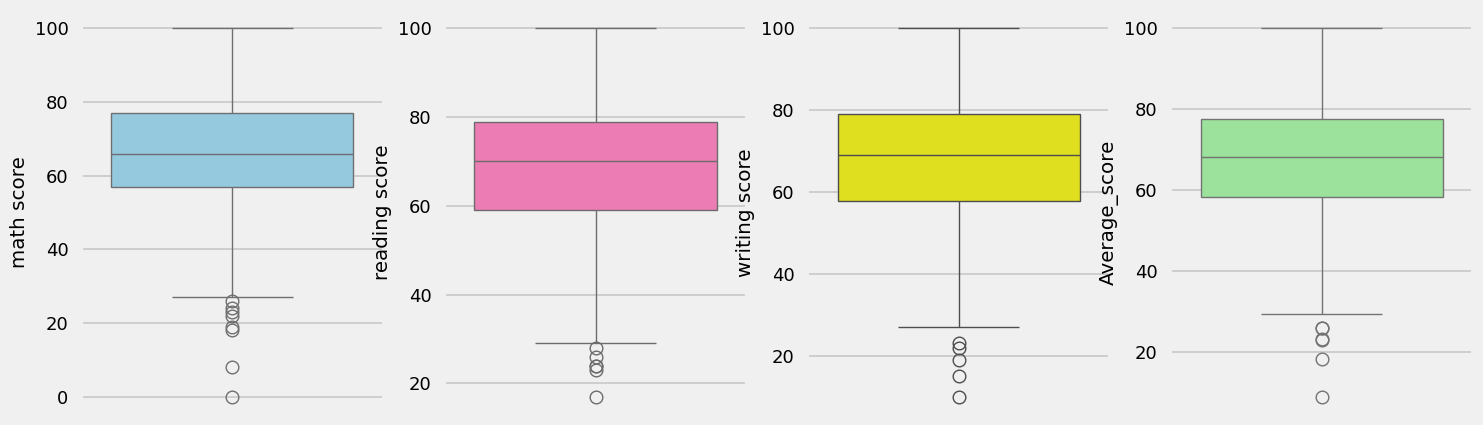

In [26]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

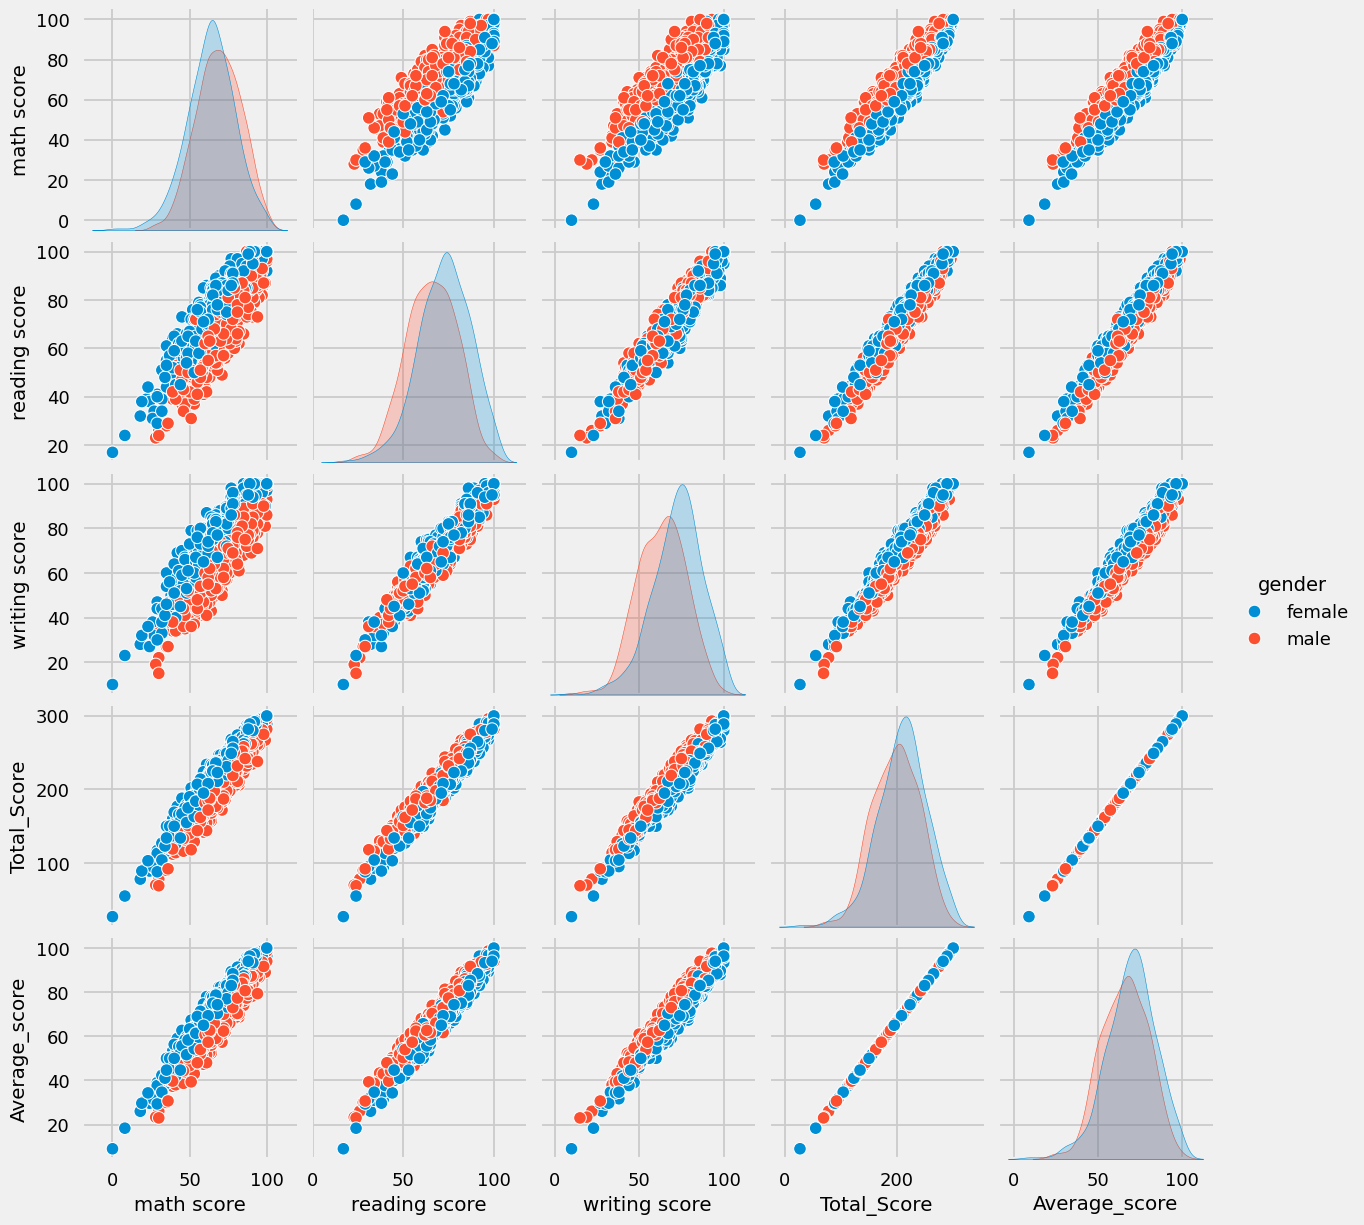

In [27]:
sns.pairplot(df,hue = 'gender')
plt.show()